In [44]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.gridspec import GridSpec

from sklearn.cluster import KMeans
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
data_path = ("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv")
df = pd.read_csv(data_path)

In [3]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [4]:
data = pd.get_dummies(df,columns=['gender'])
data.columns

Index(['10k', 'name', 'division', '25k', 'age', 'official', 'bib', 'genderdiv',
       'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k', 'half', '20k',
       'country', 'city', '40k', 'gender_F', 'gender_M'],
      dtype='object')

In [250]:
data.iloc[:, :21]
#data.iloc[:, 21]

,10k,name,division,25k,age,official,bib,genderdiv,ctz,35k,...,pace,state,30k,5k,half,20k,country,city,40k,gender_F
0,17.37,"Yamamoto, Hiroyuki",8,47.67,47,85.25,W1,8,NaN,71.40,...,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,0
1,32.58,"Jeptoo, Rita",1,82.43,33,138.95,F1,1,NaN,116.37,...,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,1
2,16.62,"Van Dyk, Ernst F.",1,45.80,41,80.60,W2,1,NaN,67.42,...,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,0
3,32.57,"Dibaba, Mare",3,82.43,24,140.58,F2,3,NaN,116.37,...,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,1
4,17.12,"Hokinoue, Kota",2,46.37,40,81.23,W3,2,NaN,67.83,...,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,0
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,29,140.68,F3,4,NaN,116.37,...,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95,1
6,17.65,"Hug, Marcel E.",4,47.67,28,84.65,W4,4,NaN,70.23,...,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83,0
7,30.48,"Geneti, Markos",5,76.95,29,129.83,5,5,NaN,107.47,...,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80,0
8,17.12,"Soejima, Masazumi",3,46.37,43,81.23,W6,3,NaN,67.83,...,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70,0
9,30.48,"Hall, Ryan",20,77.68,31,137.83,6,20,NaN,112.27,...,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83,0


In [106]:
X1 = data.iloc[:, :22]

In [109]:
X1 = X1.drop(columns=['name','bib','ctz','state','city','genderdiv'])

In [145]:
X1 = X1.drop(columns = ['wave'])

In [155]:
X1 = X1.drop(columns = ['country'])

In [14]:
#X1 = X1.rename(columns = {'10k':'tenK',
#                    '25k':'twentyFiveK',
#                    '35k':'thirtyFiveK',
#                    '30k':'thirtyK',
#                    '5k':'fiveK',
#                    '20k':'twentyK',
#                    '40k':'fortyK'})
#X1["tenK"] = pd.to_numeric(X1.tenK, errors='coerce')
#X1["twentyFiveK"] = pd.to_numeric(X1.twentyFiveK, errors='coerce')
#X1["thirtyFiveK"] = pd.to_numeric(X1.thirtyFiveK, errors='coerce')
#X1["thirtyK"] = pd.to_numeric(X1.thirtyK, errors='coerce')
#X1["fiveK"] = pd.to_numeric(X1.fiveK, errors='coerce')
#X1["twentyK"] = pd.to_numeric(X1.twentyK, errors='coerce')
#X1["fortyK"] = pd.to_numeric(X1.fortyK, errors='coerce')
#X1["half"] = pd.to_numeric(X1.half, errors='coerce')

In [196]:
X1.CAN.unique()

array([0., 1.])

In [248]:
X1.head()

,10k,division,25k,age,official,35k,overall,pace,30k,5k,...,ITA,GBR,MEX,OTHER,elite,wave1,wave2,wave3,wave4,cluster
0,17.37,8,47.67,47,85.25,71.40,8,3.27,59.18,8.02,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,32.58,1,82.43,33,138.95,116.37,21,5.30,99.33,16.22,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,16.62,1,45.80,41,80.60,67.42,1,3.08,56.45,7.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,32.57,3,82.43,24,140.58,116.37,27,5.37,99.33,16.20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,17.12,2,46.37,40,81.23,67.83,2,3.10,57.03,8.02,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [198]:
X1.columns

Index(['10k', 'division', '25k', 'age', 'official', '35k', 'overall', 'pace',
       '30k', '5k', 'half', '20k', '40k', 'gender_F', 'gender_M', 'USA', 'CAN',
       'ITA', 'GBR', 'MEX', 'OTHER', 'elite', 'wave1', 'wave2', 'wave3',
       'wave4', 'cluster'],
      dtype='object')

In [111]:
# Clean the columns that are currently strings
for col in ['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official']:
    try: X1[col] = X1[col].str.replace('-','0.0').astype(float)
    except AttributeError: pass
    except ValueError: pass

In [112]:
# Define waves
wave_definitions = {'elite':(0,100),
                    'wave1':(101,8999),
                    'wave2':(9000,17999),
                    'wave3':(18000,26999),
                    'wave4':(27000, 40000)}

# Define a function to convert bibs to waves
def convert_bib(x):    
    try:
        for key in wave_definitions:
            if wave_definitions[key][0] <= float(x) <= wave_definitions[key][1]: return key             
    except ValueError:   
        if 'W' in str(x): return 'elite'
        elif 'F' in str(x): return 'elite'    
    else: 
        print(float(x))
        return np.nan

# Create a wave column
X1['wave'] = data['bib'].apply(lambda x: convert_bib(x))

In [133]:
for country in ['USA', 'CAN', 'ITA', 'GBR', 'MEX', 'OTHER']:
    X1[country] = np.where(data['country'] == country, 1.0, 0.0)
for wave in X1['wave'].unique():
    X1[wave] = np.where(X1['wave'] == wave, 1.0, 0.0)

In [158]:
X1.columns

Index(['10k', 'division', '25k', 'age', 'official', '35k', 'overall', 'pace',
       '30k', '5k', 'half', '20k', '40k', 'gender_F', 'gender_M', 'USA', 'CAN',
       'ITA', 'GBR', 'MEX', 'OTHER', 'elite', 'wave1', 'wave2', 'wave3',
       'wave4'],
      dtype='object')

In [238]:
features.dtypes

Series([], dtype: object)

In [259]:
features = pd.DataFrame()

In [260]:
features['age'] = X1['age']
features['gender_M'] = X1['gender_M']
for country in ['USA', 'CAN','OTHER']:
    features[country] = np.where(data['country'] == country, 1, 0)
features['elite'] = X1['elite']
features['wave1'] = X1['wave1']
features['wave2'] = X1['wave2']
features['wave3'] = X1['wave3']
features['wave4'] = X1['wave4']
features['overall'] = X1['overall']
features['division'] = X1['division']
features['genderdiv'] = data['genderdiv']
for col in ['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official']:
    features[col] = X1[col]

In [261]:
features.head()

,age,gender_M,USA,CAN,OTHER,elite,wave1,wave2,wave3,wave4,...,genderdiv,5k,10k,20k,half,25k,30k,35k,40k,official
0,47,1,0,0,0,1.0,0.0,0.0,0.0,0.0,...,8,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25
1,33,0,0,0,0,1.0,0.0,0.0,0.0,0.0,...,1,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95
2,41,1,0,0,0,1.0,0.0,0.0,0.0,0.0,...,1,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60
3,24,0,0,0,0,1.0,0.0,0.0,0.0,0.0,...,3,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58
4,40,1,0,0,0,1.0,0.0,0.0,0.0,0.0,...,2,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23


In [262]:
Xone = features

# Normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(Xone)
X_normed = pd.DataFrame(np_scaled, columns=list(features))
X_normed.head(n=3)

,age,gender_M,USA,CAN,OTHER,elite,wave1,wave2,wave3,wave4,...,genderdiv,5k,10k,20k,half,25k,30k,35k,40k,official
0,0.460317,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000398,0.092237,0.154565,0.167818,0.167829,0.164937,0.157235,0.158903,0.158218,0.010147
1,0.238095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.186544,0.289909,0.293425,0.293531,0.285205,0.263909,0.258986,0.259860,0.127324
2,0.365079,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.089132,0.147891,0.160909,0.160688,0.158467,0.149981,0.150046,0.149700,0.000000


In [263]:
# Perform PCA for graphing purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normed)
pca_1 = [x[0] for x in X_pca]
pca_2 = [x[1] for x in X_pca]

X_pca

array([[ 0.91622399, -0.04251701],
       [ 0.43509002, -0.56709138],
       [ 0.92607614, -0.04219121],
       ...,
       [-0.91786387,  0.37243312],
       [-1.02394182,  0.4103156 ],
       [-0.23795232,  0.76740814]])

In [264]:
### Mean Shift
# Set bandwidth
bandwidth = estimate_bandwidth(X_normed, 
                               quantile=0.20, 
                               n_samples=500, 
                               n_jobs=1)
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth,
               bin_seeding=True)
ms.fit(X_normed)
ms_labels = ms.predict(X_normed)

ms

MeanShift(bandwidth=1.3199119007034696, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [265]:
ms_labels

array([4, 4, 4, ..., 0, 0, 0], dtype=int64)

In [266]:
X1['cluster'] = ms_labels + 1
features['cluster'] = ms_labels + 1
X1['cluster'].unique()
features['cluster'].unique()

array([5, 2, 1, 4, 3], dtype=int64)

In [267]:
X1.head()

,10k,division,25k,age,official,35k,overall,pace,30k,5k,...,ITA,GBR,MEX,OTHER,elite,wave1,wave2,wave3,wave4,cluster
0,17.37,8,47.67,47,85.25,71.40,8,3.27,59.18,8.02,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
1,32.58,1,82.43,33,138.95,116.37,21,5.30,99.33,16.22,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
2,16.62,1,45.80,41,80.60,67.42,1,3.08,56.45,7.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
3,32.57,3,82.43,24,140.58,116.37,27,5.37,99.33,16.20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
4,17.12,2,46.37,40,81.23,67.83,2,3.10,57.03,8.02,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5


Text(0,0.5,'Count of participants')

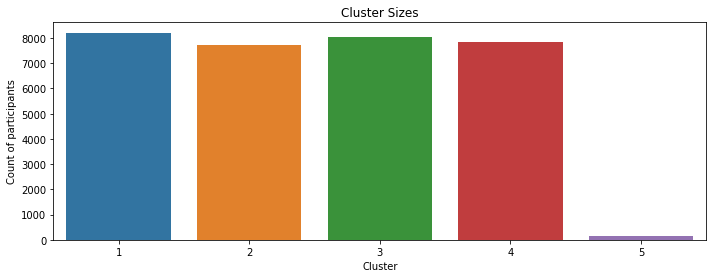

In [268]:
# Create a plot that'll do double duty by labeling the clusters by color & describing their sizes
plt.figure(figsize=(50,4))
ax1 = plt.subplot(gs[0, 0:2])    
sns.countplot(x=features['cluster'])

plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count of participants')
#cluster_labels = ['C{}'.format(x) for x in range(1,6)]
#ax1.set_xticklabels(cluster_labels)

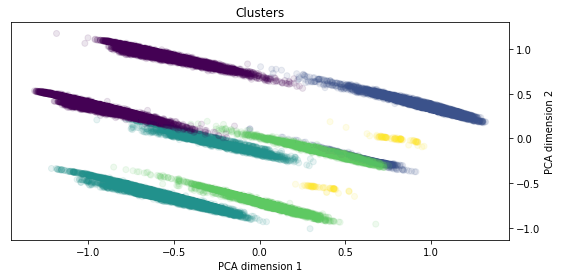

In [269]:
plt.figure(figsize=(12,4))
gs = GridSpec(1, 8)
# Visualize the blobs
ax2 = plt.subplot(gs[0, 2:])    
plt.scatter(x=pca_1,
            y=pca_2,
            c=features['cluster'],
            alpha=0.1)
plt.title('Clusters')
plt.xlabel('PCA dimension 1')
plt.ylabel('PCA dimension 2')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

In [271]:
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_normed,
    X_pca,
    test_size=0.5,
    random_state=42)

In [272]:
# Then we halve the halves.
X_1, X_2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X_3, X_4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)



In [276]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

counter = 0
for sample in [X_1, X_2, X_3, X_4]:
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(sample)
    labels = model.labels_
    counter += 1
    print('Silhouette coefficient for sample {}: {}'.format(counter, round(metrics.silhouette_score(sample, labels, metric='euclidean'),4)))

Silhouette coefficient for sample 1: 0.475
Silhouette coefficient for sample 2: 0.4697
Silhouette coefficient for sample 3: 0.4758
Silhouette coefficient for sample 4: 0.4754


## Boston Marathon Write Up

The center of what the cluster analysis does is that it brings together a toolkit that allows you to explore the data not knowing much about the data, see curiously if there are relationships within the dataset, and explore potential Y-variables with only the features in hand. 

For the Boston Marathon challenge, there was a handful of features but no real target feature to predict. To set it up, the X1 dataframe had to have a binary column within the first or second column to properly classify the cluster or there would only be one massive cluster (tried this many times) with no distinction between anything else. With the given clusters that the data had shown (5 clusters), you can do an effective prediction within those clusters to go another step and show what the attributes those clusters comprised of. For each cluster, you can see the demographics - i.e. gender, age, country - and within each cluster, you can also see race times to see within the groups how each clustered fared in the similarity of race times. We can see their wave categories between how fast they ran and how they placed as well.